In [1]:
import pandas as pd
#import numpy as np
from pandas.core.frame import DataFrame

import pickle
import statsmodels.api as sm

import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

pd.options.display.max_columns = 25

In [ ]:
# read data and merge file

In [2]:
f1 = open('customer_service_reps','rb')
csr = pickle.load(f1)
csr.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [3]:
f2 = open('engagement','rb')
engagement = pickle.load(f2)
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [4]:
f3 = open('subscribers','rb')
subscribers = pickle.load(f3)
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,...,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,...,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,...,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,...,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,...,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,...,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [5]:
advertising_spend = pd.read_excel('advertising_spend_data.xlsx')
advertising_spend.columns = advertising_spend.iloc[1]
advertising_spend = advertising_spend.drop([0,1])
advertising_spend.head()

1,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
2,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
3,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
4,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
5,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
6,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300


In [8]:
#subscribers.columns.values.tolist()
#csr.columns.values.tolist()
#engagement.columns.values.tolist()
#print(subscribers['account_creation_date'].min())
# max: 2020-03-27 23:59:06
# min: 2019-06-30 00:00:19

2019-06-30 00:00:19


# churn

### Notes

In [ ]:
# churn a. 【csr】current_sub_TF == False (customer that is leaving service)
#       b. 【csr】current _sub_Tf == True & 【csr】cancel_date has record (customer that decide to leave) 不用管了，现在是subscriber的全都没有cancel-date

##### select record that i define as churn
##### that is current_sub_TF is false (do not need to consider about trial_completed_TF and renew, sine renew has lot of null value)

In [6]:
churn = csr 

In [7]:
# define churn
churn_true = churn.loc[churn['current_sub_TF'] == False] 
# label churn, so that i can merge it to the engagement file and put them into model
churn_true['churn_TF'] = 1.0
churn_true_1 = churn_true.loc[:,['subid','churn_TF']]

#churn_true_1 #1390355 rows

<ipython-input-7-bc78d23217d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_true['churn_TF'] = 1.0


In [12]:
# calculate how many unique id in the whole set
#a = list(churn['subid'].unique())
#len(a) #1369360

1369360

In [8]:
# but one id may have several records, so I need to find unique id with his/her latest payement
# method groupby then find max payment period
churn_1=churn.groupby('subid',as_index = False).apply(lambda x: max(x['payment_period']))
# rename NaN to max_payment_period
churn_1.columns = pd.Series(['subid','max_payment_period'])
churn_1 #1369360  rows, the same as previous one !

,subid,max_payment_period
0,20000002,0
1,20000003,0
2,20000007,0
3,20000014,0
4,20000031,0
...,...,...
1369355,29999986,2
1369356,29999991,1
1369357,29999993,0
1369358,29999997,0


##### merge engagement record to form a full table

In [9]:
# some people do not have engagement data  so we need left join then drop the record which engagement data is null
churn_2 = pd.merge(churn_1,engagement,how = 'left',on ='subid' )
churn_3 = churn_2.dropna(subset = ['app_opens'])
#churn_2 #3820065    
#churn_3 #2551113   
# the reason churn_3 rows > churn_1 is one id may have several engagment records 

In [20]:
#churn_3['subid'].value_counts()
# max - 107, one of max is c
#aa = churn_3[churn_3['subid'] == 24532379]
#aa # from 2019-07-06 to 2019-10-20 
#bb = churn_3[churn_3['subid'] == 24524748]
#bb # from 2019-11-21 to 2019-02-04 
#everyone is different

,subid,max_payment_period,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1731637,24524748,2,2019-11-21,1.0,0.0,4.0,7.0,0.0,0.0,0.0
1731638,24524748,2,2019-11-22,1.0,2.0,6.0,6.0,0.0,1.0,0.0
1731639,24524748,2,2019-11-23,1.0,0.0,5.0,5.0,0.0,0.0,0.0
1731640,24524748,2,2019-11-24,1.0,0.0,5.0,5.0,0.0,1.0,0.0
1731641,24524748,2,2019-11-25,1.0,1.0,0.0,5.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1731708,24524748,2,2020-01-31,1.0,0.0,4.0,4.0,0.0,1.0,2.0
1731709,24524748,2,2020-02-01,1.0,0.0,4.0,4.0,0.0,1.0,2.0
1731710,24524748,2,2020-02-02,1.0,0.0,4.0,4.0,0.0,1.0,2.0
1731711,24524748,2,2020-02-03,1.0,0.0,4.0,4.0,0.0,1.0,2.0


In [23]:
#cc = csr[csr['subid'] == 24532379]
#cc # 4 records
#dd = churn_1[churn_1['subid'] == 24532379]
#dd # max_payment_period 3 

##### calculate 7-day engagement by subid

In [137]:
# so I decide to sum up the variables and use id's max date - min date, calculate daily engagement then *7, 
# calculate a week engagment then use model to predict

In [10]:
# select the columns that we need
churn_4 = churn_3.loc[:,['subid','date','app_opens','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','num_videos_rated','num_series_started']]
churn_4 #2551113 rows 

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
9,20000062,2019-06-30,1.0,0.0,2.0,7.0,0.0,0.0
10,20000062,2019-07-01,1.0,1.0,4.0,6.0,0.0,1.0
11,20000062,2019-07-02,1.0,2.0,0.0,5.0,0.0,0.0
12,20000062,2019-07-04,1.0,0.0,0.0,5.0,0.0,0.0
50,20000405,2020-03-08,1.0,2.0,7.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3820051,29999945,2020-04-17,1.0,0.0,0.0,4.0,0.0,1.0
3820052,29999945,2020-04-18,1.0,0.0,4.0,4.0,0.0,1.0
3820053,29999945,2020-04-19,1.0,0.0,3.0,4.0,0.0,0.0
3820054,29999945,2020-04-21,1.0,0.0,0.0,4.0,0.0,1.0


##### calculate time difference

In [11]:
max_date=churn_4.groupby('subid',as_index = False).apply(lambda x: max(x['date']))
# rename NaN to max_date
max_date.columns = pd.Series(['subid','max_date'])
max_date # 135019  rows # this data ＜uniqe id in csr is because some people do not have engagement data

,subid,max_date
0,20000062,2019-07-04
1,20000405,2020-03-18
2,20000604,2020-03-05
3,20000685,2020-04-15
4,20000741,2019-08-26
...,...,...
135014,29999740,2019-07-25
135015,29999820,2019-10-01
135016,29999822,2019-12-03
135017,29999889,2019-11-06


In [12]:
min_date=churn_4.groupby('subid',as_index = False).apply(lambda x: min(x['date']))
# rename NaN to min_date
min_date.columns = pd.Series(['subid','min_date'])
min_date #135019  rows

,subid,min_date
0,20000062,2019-06-30
1,20000405,2020-03-08
2,20000604,2020-02-09
3,20000685,2020-03-03
4,20000741,2019-08-25
...,...,...
135014,29999740,2019-07-11
135015,29999820,2019-09-22
135016,29999822,2019-11-22
135017,29999889,2019-08-23


In [13]:
date_difference = pd.merge(max_date,min_date,how = 'outer', on = 'subid')
date_difference['date_difference'] = date_difference['max_date'] - date_difference['min_date']
date_difference = date_difference.loc[:,['subid','date_difference']]
# the output is 4 days, we only need number
date_difference

,subid,date_difference
0,20000062,4 days
1,20000405,10 days
2,20000604,25 days
3,20000685,43 days
4,20000741,1 days
...,...,...
135014,29999740,14 days
135015,29999820,9 days
135016,29999822,11 days
135017,29999889,75 days


In [14]:
date_difference['date_difference'] = date_difference['date_difference'].dt.days.astype('int16')
date_difference

,subid,date_difference
0,20000062,4
1,20000405,10
2,20000604,25
3,20000685,43
4,20000741,1
...,...,...
135014,29999740,14
135015,29999820,9
135016,29999822,11
135017,29999889,75


In [15]:
# sum up engagment data
churn_5 = churn_4.groupby('subid',as_index = False).sum()
churn_5

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,20000062,4.0,3.0,6.0,23.0,0.0,1.0
1,20000405,5.0,4.0,13.0,17.0,0.0,1.0
2,20000604,14.0,5.0,8.0,68.0,0.0,1.0
3,20000685,46.0,10.0,14.0,165.0,0.0,8.0
4,20000741,1.0,1.0,2.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...
135014,29999740,15.0,3.0,11.0,31.0,0.0,0.0
135015,29999820,12.0,6.0,22.0,50.0,0.0,7.0
135016,29999822,5.0,4.0,2.0,25.0,0.0,1.0
135017,29999889,245.0,45.0,326.0,326.0,40.0,68.0


In [16]:
# merge max_payment_peirod
churn_6 = pd.merge(churn_5,churn_1,how = 'left', on = 'subid')
churn_6

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,max_payment_period
0,20000062,4.0,3.0,6.0,23.0,0.0,1.0,0
1,20000405,5.0,4.0,13.0,17.0,0.0,1.0,0
2,20000604,14.0,5.0,8.0,68.0,0.0,1.0,1
3,20000685,46.0,10.0,14.0,165.0,0.0,8.0,1
4,20000741,1.0,1.0,2.0,7.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
135014,29999740,15.0,3.0,11.0,31.0,0.0,0.0,0
135015,29999820,12.0,6.0,22.0,50.0,0.0,7.0,0
135016,29999822,5.0,4.0,2.0,25.0,0.0,1.0,0
135017,29999889,245.0,45.0,326.0,326.0,40.0,68.0,2


In [17]:
# merge date difference and calculate 7 days data
churn_7 = pd.merge(churn_6,date_difference,how = 'left', on = 'subid')
churn_7 ['coee']= 7/churn_7 ['date_difference']

#change inf to 1 (inf because somebody's date difference is 0.use only one day)
where_are_inf = np.isinf(churn_7)
churn_7[where_are_inf] = 1
# calculate week engagement
churn_7 ['app_opens'] = churn_7 ['app_opens'] * churn_7 ['coee']
churn_7 ['cust_service_mssgs'] = churn_7 ['cust_service_mssgs'] * churn_7 ['coee']
churn_7 ['num_videos_completed'] = churn_7 ['num_videos_completed'] * churn_7 ['coee']
churn_7 ['num_videos_more_than_30_seconds'] = churn_7 ['num_videos_more_than_30_seconds'] * churn_7 ['coee']
churn_7 ['num_videos_rated'] = churn_7 ['num_videos_rated'] * churn_7 ['coee']
churn_7 ['num_series_started'] = churn_7 ['num_series_started'] * churn_7 ['coee']

churn_7

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,max_payment_period,date_difference,coee
0,20000062,7.000000,5.250000,10.500000,40.250000,0.000000,1.750000,0,4,1.750000
1,20000405,3.500000,2.800000,9.100000,11.900000,0.000000,0.700000,0,10,0.700000
2,20000604,3.920000,1.400000,2.240000,19.040000,0.000000,0.280000,1,25,0.280000
3,20000685,7.488372,1.627907,2.279070,26.860465,0.000000,1.302326,1,43,0.162791
4,20000741,7.000000,7.000000,14.000000,49.000000,0.000000,0.000000,0,1,7.000000
...,...,...,...,...,...,...,...,...,...,...
135014,29999740,7.500000,1.500000,5.500000,15.500000,0.000000,0.000000,0,14,0.500000
135015,29999820,9.333333,4.666667,17.111111,38.888889,0.000000,5.444444,0,9,0.777778
135016,29999822,3.181818,2.545455,1.272727,15.909091,0.000000,0.636364,0,11,0.636364
135017,29999889,22.866667,4.200000,30.426667,30.426667,3.733333,6.346667,2,75,0.093333


In [18]:
# put churn-TF to csr file
churn_8 = pd.merge(churn_7,churn_true_1,how = 'left', on = 'subid')
# replace non (that is not churn) with 0 
churn_8 = churn_8.fillna(0.0)
churn_8

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,max_payment_period,date_difference,coee,churn_TF
0,20000062,7.000000,5.250000,10.500000,40.250000,0.000000,1.750000,0,4,1.750000,1.0
1,20000405,3.500000,2.800000,9.100000,11.900000,0.000000,0.700000,0,10,0.700000,1.0
2,20000604,3.920000,1.400000,2.240000,19.040000,0.000000,0.280000,1,25,0.280000,0.0
3,20000685,7.488372,1.627907,2.279070,26.860465,0.000000,1.302326,1,43,0.162791,0.0
4,20000741,7.000000,7.000000,14.000000,49.000000,0.000000,0.000000,0,1,7.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
164067,29999822,3.181818,2.545455,1.272727,15.909091,0.000000,0.636364,0,11,0.636364,1.0
164068,29999889,22.866667,4.200000,30.426667,30.426667,3.733333,6.346667,2,75,0.093333,1.0
164069,29999889,22.866667,4.200000,30.426667,30.426667,3.733333,6.346667,2,75,0.093333,1.0
164070,29999889,22.866667,4.200000,30.426667,30.426667,3.733333,6.346667,2,75,0.093333,1.0


# model

In [19]:
churn_final = churn_8.drop(columns = ['date_difference','coee'])
churn_final

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,max_payment_period,churn_TF
0,20000062,7.000000,5.250000,10.500000,40.250000,0.000000,1.750000,0,1.0
1,20000405,3.500000,2.800000,9.100000,11.900000,0.000000,0.700000,0,1.0
2,20000604,3.920000,1.400000,2.240000,19.040000,0.000000,0.280000,1,0.0
3,20000685,7.488372,1.627907,2.279070,26.860465,0.000000,1.302326,1,0.0
4,20000741,7.000000,7.000000,14.000000,49.000000,0.000000,0.000000,0,1.0
...,...,...,...,...,...,...,...,...,...
164067,29999822,3.181818,2.545455,1.272727,15.909091,0.000000,0.636364,0,1.0
164068,29999889,22.866667,4.200000,30.426667,30.426667,3.733333,6.346667,2,1.0
164069,29999889,22.866667,4.200000,30.426667,30.426667,3.733333,6.346667,2,1.0
164070,29999889,22.866667,4.200000,30.426667,30.426667,3.733333,6.346667,2,1.0


In [20]:
df_train, df_test = model_selection.train_test_split(churn_final, test_size=0.3)

In [61]:
#df_train.isnull().any()
#df_test.isnull().any()
# all false

const                              False
subid                              False
app_opens                          False
cust_service_mssgs                 False
num_videos_completed               False
num_videos_more_than_30_seconds    False
num_videos_rated                   False
num_series_started                 False
max_payment_period                 False
churn_TF                           False
dtype: bool

In [21]:
df_train # inf? # because some is data difference is 0, so it becomes infinate

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,max_payment_period,churn_TF
138118,28410305,7.000000,5.250000,17.500000,31.500000,0.0,3.500000,0,1.0
42251,22563601,4.136364,1.909091,15.272727,19.090909,0.0,2.863636,1,1.0
131841,28034087,6.222222,1.088889,3.577778,13.066667,0.0,1.866667,1,1.0
53001,23208678,7.000000,1.615385,3.769231,9.153846,0.0,0.538462,0,1.0
61823,23749851,0.840000,0.840000,0.280000,4.200000,0.0,0.000000,1,0.0
...,...,...,...,...,...,...,...,...,...
48013,22909216,5.000000,2.000000,5.000000,22.000000,0.0,1.000000,0,1.0
50181,23041906,7.000000,10.500000,40.250000,40.250000,0.0,5.250000,0,1.0
117911,27174322,1.400000,0.933333,1.400000,8.400000,0.0,0.000000,1,1.0
59526,23611136,7.000000,2.333333,13.416667,36.750000,0.0,4.666667,0,1.0


In [22]:
asdf = churn_7[churn_7['subid'] == 27007611]
asdf

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,max_payment_period,date_difference,coee
94763,27007611,1.0,2.0,7.0,7.0,0.0,0.0,0,0,1.0


In [ ]:
# define functions

In [109]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


In [110]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [111]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['app_opens', 'cust_service_mssgs', 'num_videos_completed', 'num_videos_more_than_30_seconds','num_videos_rated',
              'num_series_started','max_payment_period']    # list of x covariates
add_constant_TF = True

In [112]:
# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [113]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     5184.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:28:57   Log-Likelihood:                -41245.
No. Observations:              114850   AIC:                         8.251e+04
Df Residuals:                  114842   BIC:                         8.258e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [114]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.370483
         Iterations 8

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:               114850
Model:                          Logit   Df Residuals:                   114842
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.2528
Time:                        19:29:00   Log-Likelihood:                -42550.
converged:                       True   LL-Null:                       -56943.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
app_opens                        

In [115]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

IndexError: list index out of range

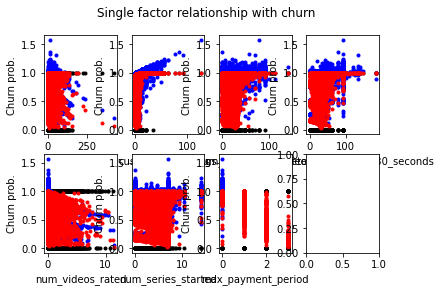

In [116]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

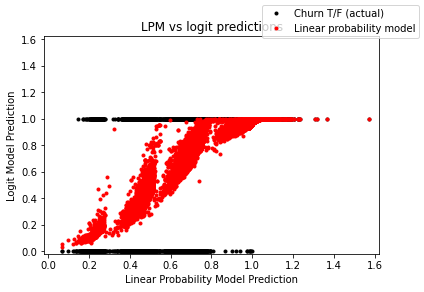

In [117]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [118]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

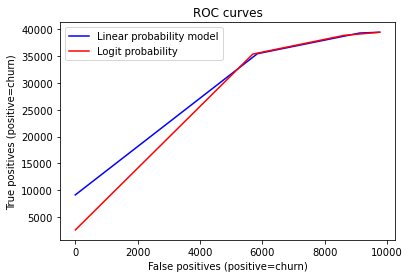

In [119]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [169]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 5
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [170]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [171]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [172]:
# test sensitivity to offer discount amount (acceptance_rate_churn = discount_amount)
df_lift_discount_amount = pd.DataFrame(index=range(0,100,1), columns = ['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acceptance_rate_churn_dynamic = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn_dynamic, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

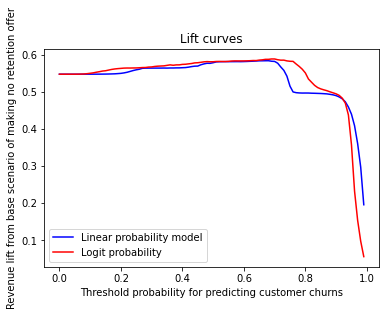

In [173]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [174]:
lmp_offer_max = df_lift_threshold['lpm_offer'].max()
lmp_offer_max

0.583294069445867

In [175]:
logit_offer_max = df_lift_threshold['logit_offer'].max()
logit_offer_max

0.5880159786950732

In [176]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['lpm_offer'][i] == lmp_offer_max:
        print(df_lift_threshold['threshold'][i])

0.68


In [177]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['logit_offer'][i] == logit_offer_max:
        print(df_lift_threshold['threshold'][i])

0.69


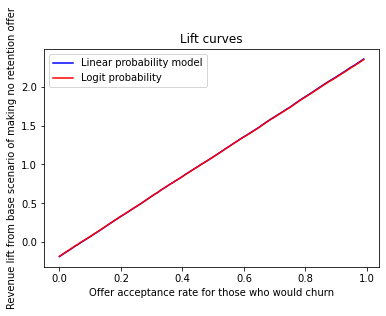

In [178]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

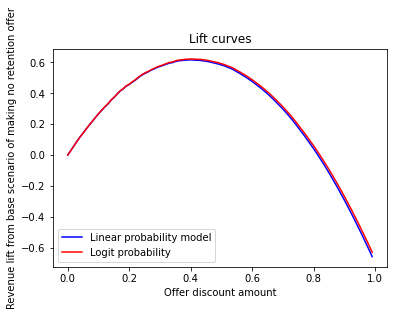

In [179]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [180]:
lmp_offer_max_1 = df_lift_threshold['lpm_offer'].max()
lmp_offer_max_1

0.583294069445867

In [181]:
logit_offer_max_1 = df_lift_threshold['logit_offer'].max()
logit_offer_max_1

0.5880159786950732

In [182]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['lpm_offer'][i] == lmp_offer_max:
        print(df_lift_threshold['threshold'][i])

0.68


In [183]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['logit_offer'][i] == logit_offer_max:
        print(df_lift_threshold['threshold'][i])

0.69


In [ ]:
# repeat

In [184]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.69
base_price = 5
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [185]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [186]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [199]:
# test sensitivity to offer discount amount (acceptance_rate_churn = discount_amount)
df_lift_discount_amount = pd.DataFrame(index=range(0,100,1), columns = ['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acceptance_rate_churn_dynamic = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn_dynamic, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

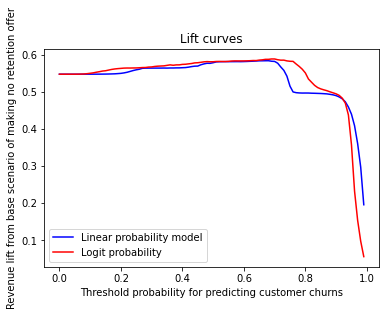

In [200]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [201]:
lmp_offer_max = df_lift_threshold['lpm_offer'].max()
lmp_offer_max

0.583294069445867

In [190]:
logit_offer_max = df_lift_threshold['logit_offer'].max()
logit_offer_max

0.5880159786950732

In [191]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['lpm_offer'][i] == lmp_offer_max:
        print(df_lift_threshold['threshold'][i])

0.68


In [192]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['logit_offer'][i] == logit_offer_max:
        print(df_lift_threshold['threshold'][i])

0.69


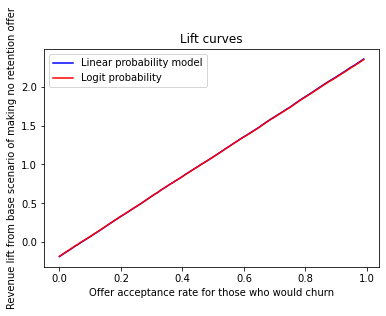

In [193]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

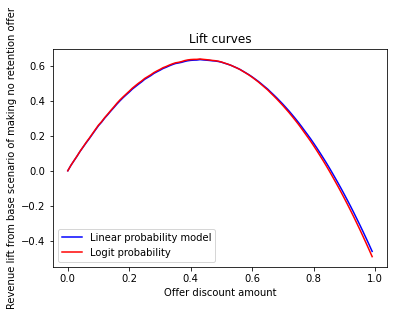

In [202]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [208]:
lmp_offer_max_3 = df_lift_discount_amount['lpm_offer'].max()
lmp_offer_max_3

0.6366178428761657

In [209]:
logit_offer_max_4 = df_lift_discount_amount['logit_offer'].max()
logit_offer_max_4

0.6403646420157738

In [215]:
for i in range(df_lift_discount_amount.shape[0]):
    if df_lift_discount_amount['lpm_offer'][i] == lmp_offer_max_3:
        print(df_lift_discount_amount['discount_amount'][i])

0.43


In [216]:
for i in range(df_lift_discount_amount.shape[0]):
    if df_lift_discount_amount['logit_offer'][i] == logit_offer_max_4:
        print(df_lift_discount_amount['discount_amount'][i])

0.43


In [ ]:
# base price is $5 threshold is 0.69, discount is 0.43